<h1>Tipos de gráfico</h1>

En este notebook vamos a revisar algunos de las funciones que nos ofrece matplotlib para la generación de diferentes tipos de gráficos. Como se ha comentado, estas funciones siguen el estilo de base-r teniendo cada una de ellas un conjunto amplio de parámetros que permiten definir todas sus características (desde datos, a colores, estilos, etc.).

Como se ha visto en ejemplos anteriores, estas funciones se pueden utilizar de forma conjunta como diferentes componentes "o capas" de un determinado gráfico. Esta composición se realiza mediante llamada secuencial "en orden" y se podrá obtener el resultado de la composición mediante la llamada a la función <b>show</b>.

Empecemos habilitando el renderizado de gráficos en notebooks e importando los módulos pyplot, pandas y numpy.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para probar los diferentes tipo de gráficos, vamos a utilizar los mismos sets de datos que se usaron para ggplot2. Es decir, <b>mtcars</b> y <b>diamonds</b>. Los dejamos precargados mediante la utilización de pandas.

In [2]:
mtcars = pd.read_table('data/mtcars.txt', sep=',')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
diamonds = pd.read_table('data/diamonds.txt', sep=',')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Dado que el tiempo es limitado, es esta clase no vamos a ver todos los posibles tipos de gráfico disponibles en matplotlib. Para consultar el conjunto completo de tipos de gráficos soportados por matplotlib, utiliza <a href="http://matplotlib.org/api/pyplot_summary.html">este enlace</a> o <a href="http://matplotlib.org/gallery.html">este otro</a>.

<h2>Líneas</h2>

Se trata del tipo de gráfico "por defecto" de matplotlib. Se crean mediante la función <b>plot</b>.

Según la documentación, esta función recibe dos parámetros:

<ul>
<li>Parámetro <b>args</b>: Se trata de un conjunto arbitrario de grupos de parámetros con la forma x, y, z, donde:
<ul>
    <li>x: Contiene el conjunto de valores a usar en el eje de las X.</li>
    <li>y: Contiene el conjunto de valores a usar en el eje de las Y.</li>
    <li>z: Contiene una cadena que especifica el formato de la línea.</li>
</ul>
</li>
<li>Parámetro <b>kwargs</b>: Se trata de un conjunto arbitrario de parámetros que permiten establecer de forma global el estilo de las líneas incluidas en el gráfico.
</ul>

En este <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">enlace</a> se puede encontrar la especificación completa de valores posibles tanto para las cadenas de formato del parámetro <b>args</b> como de parámetros disponibles para su configuración el parámetro <b>kwargs</b>.

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

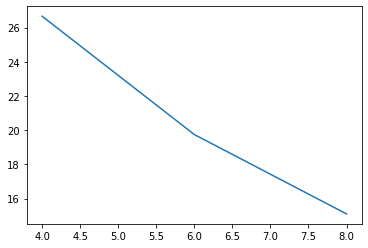

In [4]:
# Gráfico de líneas de cilindros contra consumo
mpg_cyl = mtcars['mpg'].groupby(mtcars['cyl']).mean()
display(mpg_cyl)
plt.plot(mpg_cyl.index, mpg_cyl.values)
plt.show()

,mpg,hp
cyl,,
4,26.663636,82.636364
6,19.742857,122.285714
8,15.100000,209.214286


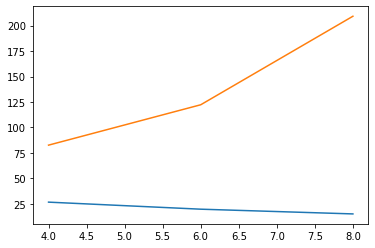

In [5]:
# Comparativa de tendencia de consumo y caballos contra cilindros
dataset = mtcars.groupby('cyl')[['mpg','hp']].mean()
display(dataset)
plt.plot(dataset.index, dataset.values)
plt.show()

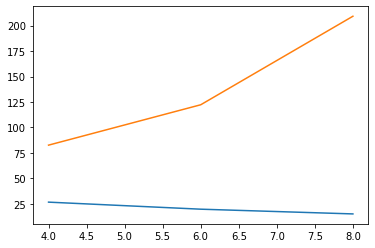

In [6]:
# Múltiples líneas en un mismo gráfico 
# resultado igual al anterior
dataset = mtcars.groupby('cyl')
mpg_cyl = dataset['mpg'].mean()
hp_cyl = dataset['hp'].mean()
plt.plot(mpg_cyl.index, mpg_cyl.values, hp_cyl.index, hp_cyl.values)
plt.show() 

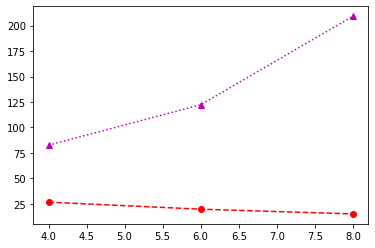

In [7]:
# Modificación de estilos mediante cadenas de formato
dataset = mtcars.groupby('cyl')[['mpg', 'hp']].mean()
plt.plot(dataset.index, dataset.mpg, 'o--r', dataset.hp,':^m')
plt.show()

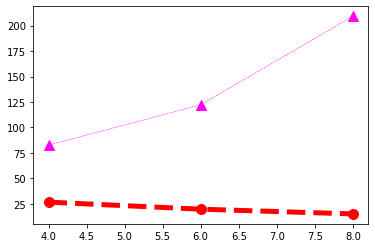

In [8]:
# Modificación de estilo mediante parámetros de línea
plt.plot(dataset.index, dataset.mpg, color="red", linestyle="dashed", 
         marker="o", linewidth=5, markersize=10)
plt.plot(dataset.index, dataset.hp, color="magenta", linestyle="--", 
         marker="^", linewidth=.5, markersize=10)
plt.show()

<h2>Área</h2>

En este caso nos encontramos, de nuevo, con gráficos de línea con la "peculiaridad" de que en este caso el área por debajo (o encima si los valores son negativos) de la línea hasta el eje de las X irá relleno. La función ofrecida por matplotlib para este tipo de gráfico se llama <b>stackplot</b> y sus parámetros son idénticos a los de <b>plot</b>.

De nuevo, para un listado completo de posibles valores para los parámetros de formatos, se puede consultar <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.stackplot">este enlace</a>.

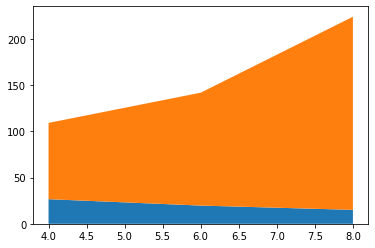

In [9]:
# Gráfico de área (stacked) de cilindros contra consumo y caballos
plt.stackplot(dataset.index, dataset.mpg, dataset.hp) 
plt.show()

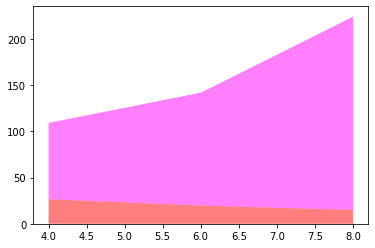

In [10]:
# Modificación de estilos y colores
plt.stackplot(dataset.index, dataset.mpg, dataset.hp, 
              colors=["red", "magenta"], alpha=.5, linewidth=2)
plt.show()

<h2>Puntos (scatter)</h2>

Uno de los gráficos más utilizados es el denominado gráfico de puntos o scatter plot. En este caso, matplotlib nos ofrece la función <b>scatter</b>. Esta función recibirá, como mínimo, un conjunto de valores para el eje de las X y un conjunto de valores para el eje de las Y. 

Adicionalmente, pone a nuestra disposición un conjunto de parámetros que nos permitirán controlar diferentes características visuales de los puntos representados: tamaño, alpha, color, tipo de punto... En otras palabras, la función incluye parámetros específicos para cada "aesthetic" del gráfico.

La definición completa de la función y sus parámetros se puede encontrar en <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter">este enlace</a>.

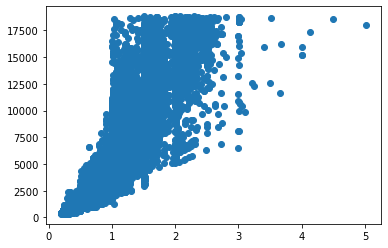

In [11]:
# Gráfico de quilates contra precio
plt.scatter(diamonds.carat, diamonds.price)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

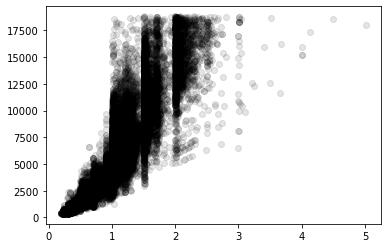

In [12]:
# Gráfico de quilates contra precio, con estilos para mejorar la visualización
plt.scatter(diamonds.carat, diamonds.price, color='black', alpha=.1)
plt.show

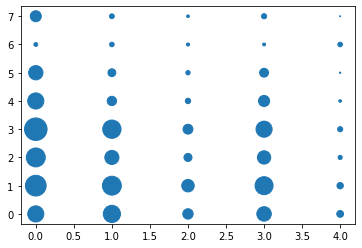

In [13]:
# Gráfico de corte contra claridad con la proporción como tamaño del punto
x_values = []
y_values = []
sizes = []

for i, element_i in enumerate(diamonds.cut.unique()):
    for j, element_j in enumerate(diamonds.clarity.unique()):
        x_values.append(i)
        y_values.append(j)
        sizes.append(diamonds.loc[(diamonds.cut == element_i) & 
                                  (diamonds.clarity==element_j)
                                 ].size/100)

plt.scatter(x_values, y_values, s=sizes)
plt.show()

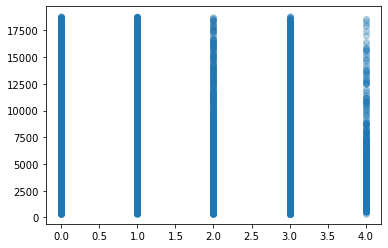

In [14]:
# Gráfico de corte contra precio
cuts = list(diamonds.cut.unique())
x_values = [cuts.index(element) for element in diamonds.cut]
y_values = diamonds.price

plt.scatter(x_values, y_values, alpha=.1)
plt.show()

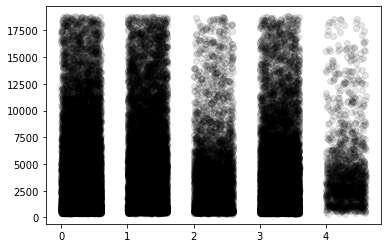

In [15]:
# Jitter manual
cut = list(diamonds.cut.unique())
x_values = [cut.index(element) + np.random.uniform(0,.6) 
            for element in diamonds.cut]
y_values = diamonds.price

plt.scatter(x_values, y_values, color='black', alpha=.1)
plt.show()

<h2>Barras</h2>

Para la creación de gráficos de barra, matplotlib pone a nuestra disposición dos funciones: <b>bar</b> y <b>barh</b> (en función de la orientación que queramos dar al gráfico). Para su creación tendremos que pasar, de nuevo, el conjunto de valores del eje X y el conjunto de valores del eje Y.

Adicionalmente, como ocurre con gráficos anteriores, dispondremos de parámetros específicos para controlar las diferentes características visuales: barras centradas en su valor, ancho de las barras, ticks a utilizar en cada una de las barras...

La definición completa de la función y sus parámetros la podemos encontrar en <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar">este enlace</a>.

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64


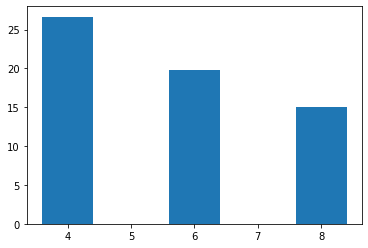

In [16]:
# Gráfico de barras con la media de consumo por cilindros
mpg_cyl = mtcars.mpg.groupby(mtcars.cyl).mean() # other to do this groupby is: mtcars.groupby('cyl')['mpg'].mean()
print(mpg_cyl)

plt.bar(mpg_cyl.index, mpg_cyl.values)
plt.show()

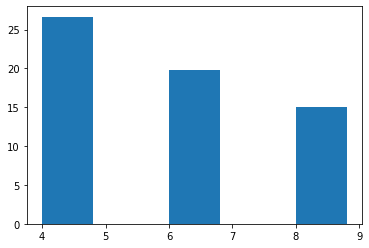

In [17]:
# Centramos las barras en los valores
plt.bar(mpg_cyl.index, mpg_cyl.values, align='edge') #supported values for align are 'center' and 'edge'
plt.show()

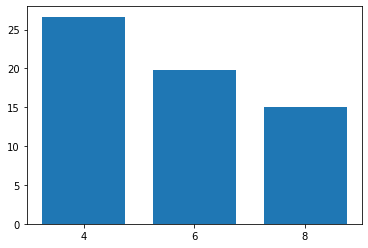

In [18]:
# Establecemos un ancho para las barras y eliminamos los ticks extra
plt.bar(mpg_cyl.index, mpg_cyl.values, align='center', width=1.5, 
        tick_label=['4','6','8']) # or tick_label=[4,6,8]
plt.show()

<BarContainer object of 3 artists>

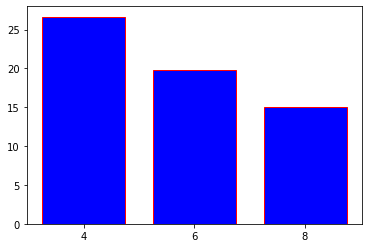

In [19]:
# Establecemos estilos
plt.bar(mpg_cyl.index, mpg_cyl.values, align='center', width=1.5, 
        tick_label=[4,6,8], color='blue', edgecolor='red')

<BarContainer object of 3 artists>

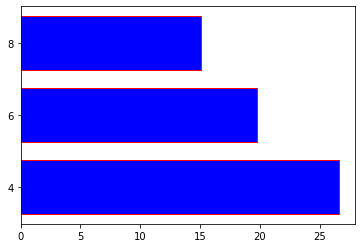

In [20]:
# Cambiamos la orientación del gráfico
plt.barh(mpg_cyl.index, mpg_cyl.values, align='center', height=1.5, 
         tick_label=[4,6,8], color='blue', edgecolor='red')

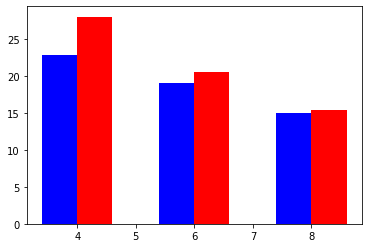

In [21]:
# Gráficos de barras múltiples
mpg_cyl_a = mtcars[mtcars['am']==0]['mpg'].groupby(mtcars.cyl).mean()
mpg_cyl_m = mtcars[mtcars['am']==1]['mpg'].groupby(mtcars.cyl).mean()

plt.bar(mpg_cyl_a.index-.3, mpg_cyl_a.values, color='b', width=.6, align='center')
plt.bar(mpg_cyl_m.index+.3, mpg_cyl_m.values, color='r', width=.6, align='center')
plt.show()


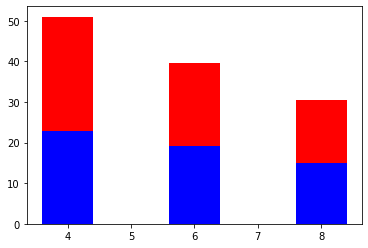

In [22]:
# Gráficos de barras stacked
plt.bar(mpg_cyl_a.index, mpg_cyl_a.values, color='b')
plt.bar(mpg_cyl_m.index, mpg_cyl_m.values, color='r', bottom=mpg_cyl_a.values)
plt.show()

<h2>Tarta</h2>

Al contrario que en ggplot2, matplotlib sí ofrece una forma directa para llevar a cabo la creación de gráficos de tarta. En concreto, disponemos de la función <b>pie</b>. Para la construcción de un gráfico de tarta, será necesario suministrar a la función un conjunto único de valores de forma que el módulo presentará la proporción de cada uno de los valores suministrados sobre el total.

Como hasta ahora, la función pone a nuestra disposición un conjunto de parámetros visuales con los que personalizar el gráfico resultante: colores, representación de porcentajes dentro de gajos, resaltado de gajos...

La documentación de la función se puede encontrar en <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie">este enlace</a>.

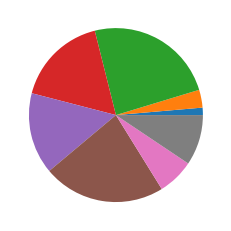

In [23]:
# Proporción por claridad
dataset = diamonds.groupby('clarity').size()
plt.pie(dataset)
plt.show()

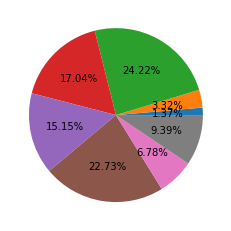

In [24]:
# Proporción por claridad con porcentaje autocalculados
plt.pie(dataset, autopct="%.2f%%")
plt.show()

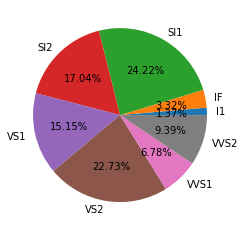

In [25]:
# Proporción por claridad con labels en cada gajo
plt.pie(dataset, autopct="%.2f%%", labels=dataset.index)
plt.show()

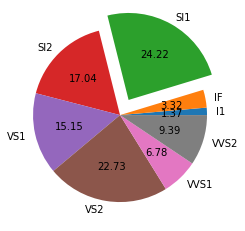

In [26]:
# Proporción por claridad con labels en cada gajo y "explotando" el mayor
explode = pd.Series(np.zeros_like(dataset), index=dataset.index, 
                    dtype=np.float32)
explode[dataset.argmax()] = .2

plt.pie(dataset,autopct="%.2f", labels=dataset.index, explode=explode)
plt.show()

<h2>Histogramas</h2>

Mediante la función <b>hist</b>, matplotlib nos permite llevar a cabo la creación de histogramas para la representación de la distribución de una variable numérica. Este conjunto de valores numéricos será el único parámetros obligatorio necesario para la creación del gráfico.

Adicionalmente, dispondremos de parámetros para controlar: número de bins del histograma, normalización del histograma (de forma que obtengamos densidades), indicación de si se debe realizar un histograma acumulativo...

La definición de la función, se puede encontrar <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist">aquí</a>.

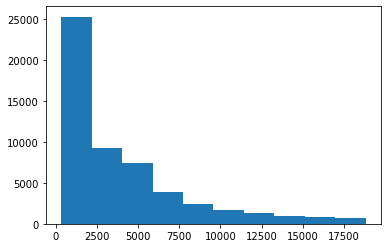

In [27]:
# Histograma básico
plt.hist(diamonds.price)
plt.show()

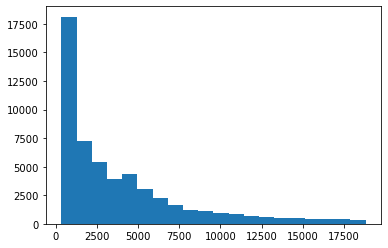

In [28]:
# Histograma básico fijando el número de bins
plt.hist(diamonds.price, bins=20)
plt.show()

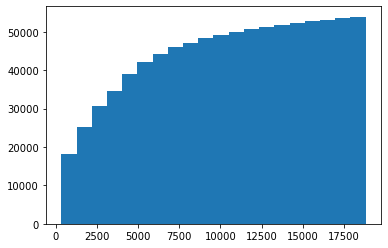

In [29]:
# Histograma acumulativo
plt.hist(diamonds['price'], bins = 20, cumulative = True)
plt.show()

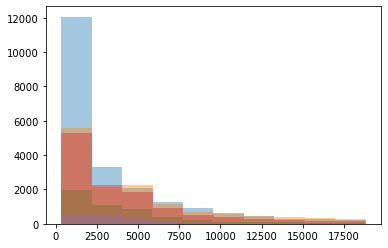

In [30]:
# Histograma múltiple stacked
for i in diamonds.cut.unique():
    plt.hist(diamonds[diamonds.cut==i]['price'].values, stacked=True, alpha=.4)
plt.show()

<h2>Box-plot</h2>

En matplotlib, no podía faltar la posibilidad de generar un gráfico de boxplot. Para ello, disponemos de la función <b>boxplot</b> que recibirá un conjunto de valores sobre el que calcular los rangos, medianas, bigotes y outliers.

Dispondremos, como hasta ahora, de un conjunto amplio de parámetros opcionales que nos permitirán controlar: tipo de punto para representar outliers, control de si se muestran o no cajas y bigotes...

La documentación de la función, en <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot">este enlace</a>.

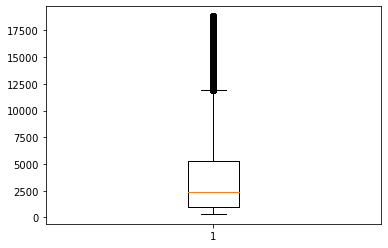

In [31]:
# Boxplot básico
plt.boxplot(diamonds.price)
plt.show()

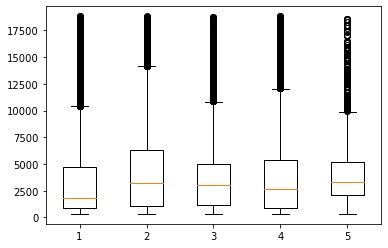

In [32]:
# Boxplot múltiple
values_boxplot=[]
for i in diamonds.cut.unique():
    values_boxplot.append(list(diamonds[diamonds.cut==i]['price'].values))

plt.boxplot(values_boxplot)
plt.show()

<h2>Violin</h2>

Aunque matplotlib no nos ofrece una función específica para la creación de curvas de densidad, sí nos ofrece la posibilidad de representar gráficos de violin (híbrido entre boxplot y curvas de densidad). Para la construcción de este tipo de gráficos, dispondremos de la función <b>violinplot</b> a la que habrá que suministrar siempre el conjunto de valores sobre el que se quiere calcular la distribución.

Como siempre, disponemos de un conjunto de parámetros adicionales con los que controlar diferentes características del gráfico: orientación, número de puntos utilizado para el cálculo de la distribución, método de cálculo...

La documentación de la función, <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.violin">aquí</a>.

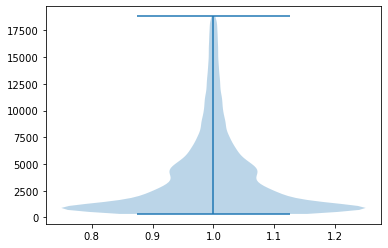

In [33]:
plt.violinplot(diamonds.price)
plt.show()

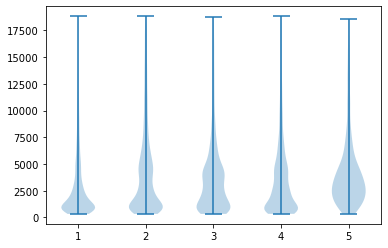

In [34]:
# Violin múltiple
plt.violinplot(values_boxplot)
plt.show()

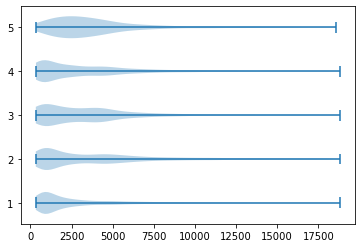

In [35]:
# Violin múltiple con orientación horizontal
plt.violinplot(values_boxplot, vert=False)
plt.show()

<h2>Rango de línea</h2>

Por último veremos los gráficos de rango de línea (dos valores de y, mínimo y máximo, para cada valor de x) para poder llevar a cabo la visualización de ejemplo que se está utilizando durante estas sesiones. Para llevar a cabo la construcción de este tipo de gráficos, matplotlib pone a nuestra disposición la función <b>vlines</b> a la que habrá que suministrar por tanto 3 series de datos (uno para cada coordenada de la línea). 

La documentación completa de la función, <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.vlines">aquí</a>.

,min,max
clarity,,
I1,4.33,10.74
IF,3.86,8.49
SI1,3.88,8.90
SI2,0.00,9.51
VS1,0.00,8.83
VS2,0.00,9.66
VVS1,0.00,8.49
VVS2,3.83,8.18


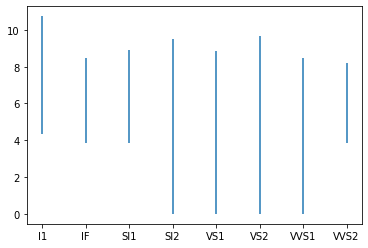

In [36]:
# Gráfico de lineas básico
min_max_x = diamonds.groupby('clarity')['x'].agg(['min','max'])
display(min_max_x)

plt.vlines(min_max_x.index, min_max_x['min'], min_max_x['max'])
plt.show()

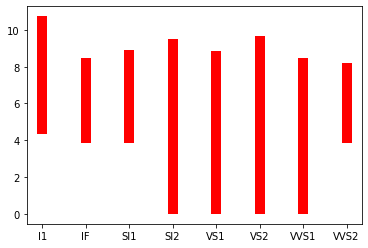

In [37]:
# Modificación de estilos
plt.vlines(min_max_x.index, min_max_x['min'], min_max_x['max'],
          linewidth=10, color='r')
plt.show()

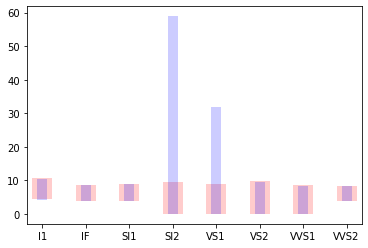

In [38]:
# Múltiples series
min_max_y = diamonds.groupby('clarity')['y'].agg(['min', 'max'])

plt.vlines(min_max_x.index, min_max_x['min'], min_max_x['max'], linewidth=20,
          color='red', alpha=.2)
plt.vlines(min_max_y.index, min_max_y['min'], min_max_y['max'], linewidth=10,
          color='blue', alpha=.2)